## Packages

In [6]:
import pandas as pd
import seaborn as sns

## Open Data 

In [28]:
#Open cleaned data for analysis
data_day = pd.read_csv('../raw_data/Trektellen/tableaux_finaux/cleaned_data_day_for_analysis.csv')
data_hour = pd.read_csv('../raw_data/Trektellen/tableaux_finaux/data_hour_for_analysis.csv')

In [29]:
# keep only migrating species
data_day = data_day.loc[data_day['direction1'] > 0]

## Species richness over the years

In [12]:
# Species richness per year
species_richness_per_year = data_day.groupby('year')['species'].nunique().reset_index(name='species_richness').sort_values(by='species_richness', ascending=False)
species_richness_per_year.sort_values(by='year')

,year,species_richness
0,2016,42
1,2017,68
2,2018,40
3,2019,56
4,2020,87
5,2021,134
6,2022,139
7,2023,124


[Text(0.5, 0, 'Année'),
 Text(0, 0.5, "Nombre d'espèces observées"),
 Text(0.5, 1.0, "Nombre d'éspèces observées par année")]

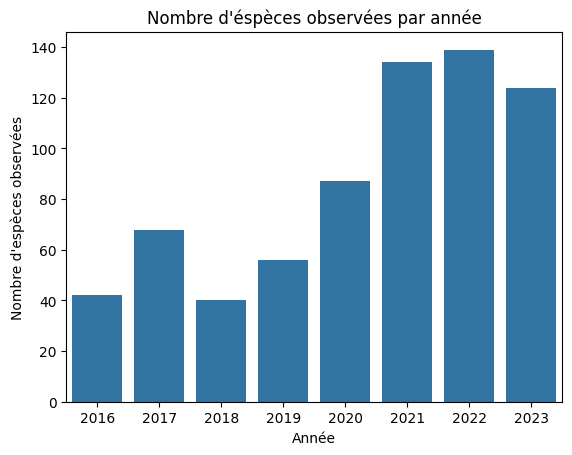

In [18]:
sns.barplot(data=species_richness_per_year, x='year', y='species_richness').set(xlabel ="Année", ylabel = "Nombre d'espèces observées", title ="Nombre d'éspèces observées par année")

## Nombre d'observateurs

[Text(0.5, 0, 'Année'),
 Text(0, 0.5, "Somme du nombre d'observateurs journaliers"),
 Text(0.5, 1.0, "Somme du nombre d'observateurs journaliers par année")]

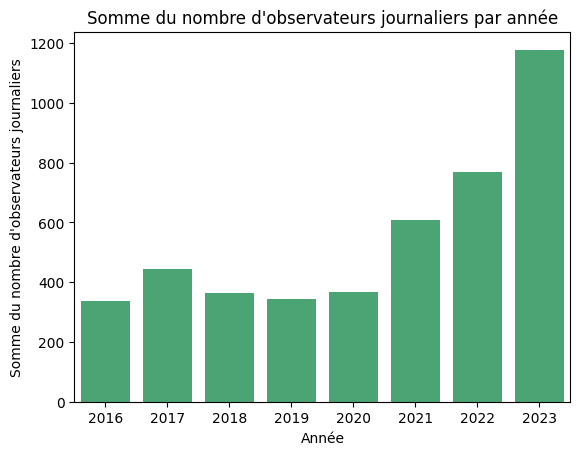

In [26]:
date_observers = data_day[['date_dt', 'year', 'n_observers']].drop_duplicates()
n_observers_per_year = date_observers.groupby(['year'])['n_observers'].sum().reset_index()
sns.barplot(data=n_observers_per_year, x='year', y='n_observers', color='mediumseagreen').set(xlabel ="Année", ylabel = "Somme du nombre d'observateurs journaliers", title ="Somme du nombre d'observateurs journaliers par année")

## Effectif Milan noir, milan royal, cigogne blanche. cigogne noire, épervier d'europe, bondrée apivore par AN

In [35]:
liste_especes = data_day[data_day['species'].isin(['Milan noir', 'Bondrée apivore', 'Milan royal','Cigogne blanche', 'Épervier d’Europe', 'Cigogne noire'])]
n_obs_species_year = liste_especes.groupby(['species', 'year'])['direction1'].sum().reset_index()
n_obs_species_year

In [39]:
n_obs_species_year = liste_especes.groupby(['species', 'year'])['direction1'].sum().reset_index()
n_obs_species_year.head()

,species,year,direction1
0,Bondrée apivore,2016,4517.0
1,Bondrée apivore,2017,4907.0
2,Bondrée apivore,2018,6232.0
3,Bondrée apivore,2019,5546.0
4,Bondrée apivore,2020,5229.0


[Text(0.5, 0, 'Année'), Text(0, 0.5, 'Somme effectif'), Text(0.5, 1.0, '')]

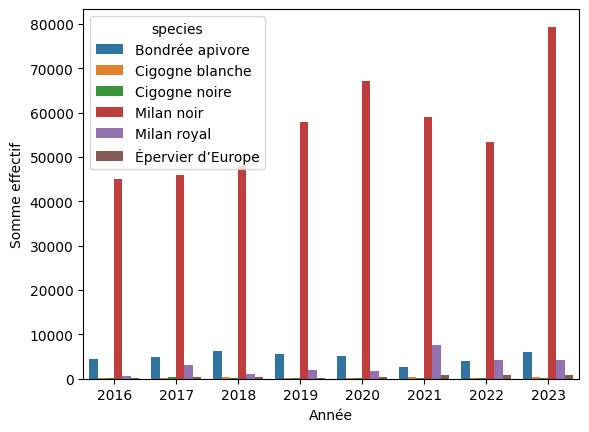

In [37]:
sns.barplot(data=n_obs_species_year, x='year', y='direction1', hue='species').set(xlabel ="Année", ylabel = "Somme effectif", title ="")

[Text(0.5, 0, 'Année'), Text(0, 0.5, 'Somme effectif'), Text(0.5, 1.0, '')]

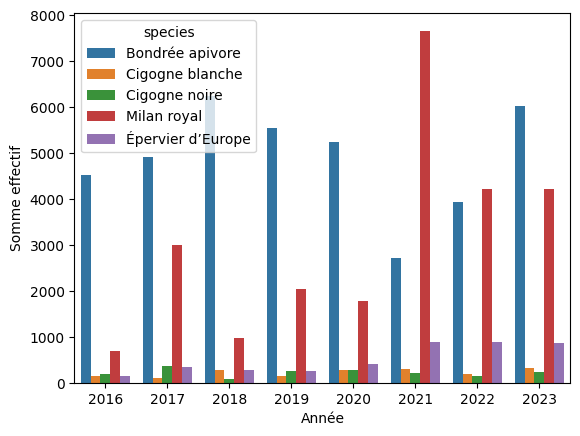

In [38]:
liste_especes = data_day[data_day['species'].isin(['Bondrée apivore', 'Milan royal','Cigogne blanche', 'Épervier d’Europe', 'Cigogne noire'])]
n_obs_species_year = liste_especes.groupby(['species', 'year'])['direction1'].sum().reset_index()
sns.barplot(data=n_obs_species_year, x='year', y='direction1', hue='species').set(xlabel ="Année", ylabel = "Somme effectif", title ="")


[Text(0.5, 0, 'Année'), Text(0, 0.5, 'Somme effectif'), Text(0.5, 1.0, '')]

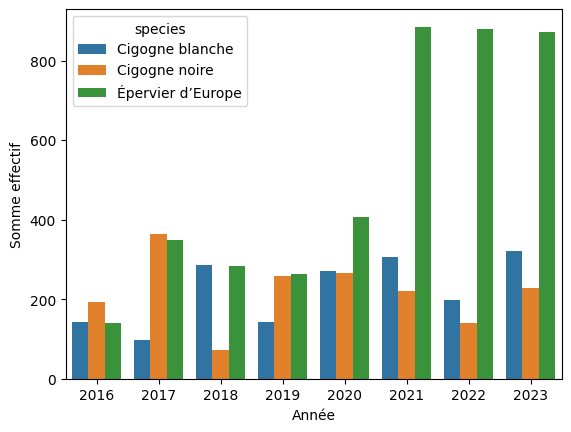

In [40]:
liste_especes = data_day[data_day['species'].isin(['Cigogne blanche', 'Épervier d’Europe', 'Cigogne noire'])]
n_obs_species_year = liste_especes.groupby(['species', 'year'])['direction1'].sum().reset_index()
sns.barplot(data=n_obs_species_year, x='year', y='direction1', hue='species').set(xlabel ="Année", ylabel = "Somme effectif", title ="")

## Effectif Milan noir, milan royal, cigogne blanche. cigogne noire, épervier d'europe, bondrée apivore par JOUR

In [42]:
liste_especes = data_day[data_day['species'].isin(['Milan noir', 'Bondrée apivore', 'Milan royal','Cigogne blanche', 'Épervier d’Europe', 'Cigogne noire'])]

In [47]:
# Milan noir
milan = liste_especes[liste_especes['species'].isin(['Milan noir'])]
milan.species.unique()

array(['Milan noir'], dtype=object)